# Introduction

Welcome to the skill assessment notebook. These exercises evaluate your proficiency in SQL, Python, and data analysis.

You can skip questions without penalty. Use resources like Google, code samples, or AI tools, but be ready to discuss your answers and approach during the interview.

For questions, contact Isaac at ikerson@gsu.edu. Once finished, save the notebook and share the link with Isaac. We look forward to reviewing your work!

# Overview of `university.db`

The `university.db` database is a mock SQLite database designed to simulate a collection of university data tables. It contains information about students, instructors, courses, grades, and more. This database is structured to provide realistic data for demonstrating data analysis skills.

## Database Schema

The database consists of the following tables:

### 1. **`student_main`**
- **Description**: Stores detailed information about students enrolled at the university.
- **Key Columns**:
  - `student_id`: Unique identifier for each student (primary key).
  - `last_name`, `first_name`: Student's name details.
  - `gender`, `ethnicity`: Demographic information.
  - `address`, `us_citizen`, `us_resident`, `state_resident`: Residential and citizenship details.
  - `pell_recipient`, `us_veteran`: Indicators for Pell Grant recipients and veteran status.
- **Relationships**:
  - Linked to `student_grades` through `student_id`.
  - Linked to `student_attributes` through `student_id`.

### 2. **`instructor_main`**
- **Description**: Contains information about university instructors.
- **Key Columns**:
  - `employee_id`: Unique identifier for each instructor (primary key).
  - `faculty_code`: Foreign key referencing `faculty_code_validation_table.faculty_code`, representing the faculty type (e.g., tenure-track, adjunct).
  - `full_time_indicator`: Binary indicator for full-time (1) or part-time (0) status.
- **Relationships**:
  - Linked to `courses` through `employee_id`.

### 3. **`faculty_code_validation_table`**
- **Description**: A lookup table that validates and describes faculty codes.
- **Key Columns**:
  - `faculty_code`: Three-letter code for faculty type (primary key).
  - `faculty_description`: Description of the faculty type.

### 4. **`courses`**
- **Description**: Represents the courses offered at the university.
- **Key Columns**:
  - `id`: Unique identifier for each course (primary key).
  - `term_code`: Academic term (e.g., Fall 2023).
  - `major_abbreviation`: Department offering the course (e.g., MATH, BIO).
  - `course_number`, `section_code`: Course and section identifiers.
  - `location_code`: Location where the course is held.
  - `delivery_code`: Mode of instruction (In-person, Hybrid, Online).
  - `credits`: Number of credit hours assigned to the course (1–3).
  - `employee_id`: Foreign key referencing `instructor_main.employee_id`, indicating the instructor teaching the course.
- **Relationships**:
  - Linked to `instructor_main` through `employee_id`.
  - Linked to `student_grades` through `section_code`.

### 5. **`student_grades`**
- **Description**: Records students' grades for courses.
- **Key Columns**:
  - `id`: Unique identifier for each grade record (primary key).
  - `student_id`: Foreign key referencing `student_main.student_id`.
  - `term_code`: Term during which the grade was earned.
  - `section_code`: Foreign key referencing `courses.section_code`.
  - `grade`: Grade received for the course.
  - `withdrawal`: Binary indicator for course withdrawal (1 for withdrawal, 0 otherwise).
- **Relationships**:
  - Linked to `student_main` through `student_id`.
  - Linked to `courses` through `section_code`.

### 6. **`student_attributes`**
- **Description**: Tracks additional attributes assigned to students for specific terms.
- **Key Columns**:
  - `id`: Unique identifier for each attribute record (primary key).
  - `student_id`: Foreign key referencing `student_main.student_id`.
  - `term_code`: Academic term for which the attribute applies.
  - `attribute_code`: Foreign key referencing `attribute_code_validation_table.attribute_code`, indicating the assigned attribute (e.g., ESL, Honors).
- **Relationships**:
  - Linked to `student_main` through `student_id`.
  - Linked to `attribute_code_validation_table` through `attribute_code`.

### 7. **`attribute_code_validation_table`**
- **Description**: A lookup table that validates and describes student attribute codes.
- **Key Columns**:
  - `attribute_code`: Three-letter code for student attributes (primary key).
  - `attribute_description`: Description of the attribute.

## Relationships Between Tables

The tables and relationships in the `university.db` database detailed in the following schema diagram:

![University Database Schema](schema_diagram.png)


### Introduction to Pandas and the `read_sql` Method

**Pandas** is a powerful Python library for data manipulation and analysis. It provides easy-to-use data structures like DataFrames and Series, which allow for efficient handling and processing of structured data. Pandas is widely used in data science, machine learning, and data analytics.

One of Pandas' strengths is its ability to seamlessly interact with SQL databases, enabling you to load query results directly into a DataFrame using the `read_sql` method. This method simplifies the process of querying databases and analyzing the results in Python.

#### What is `read_sql`?
The `pandas.read_sql()` method allows you to execute SQL queries on a database and retrieve the results as a Pandas DataFrame. It can be used to:
1. Query data from a database.
2. Load entire tables into a DataFrame.
3. Perform complex SQL queries and integrate results with Python-based analysis.

#### Basic Syntax
```python
pandas.read_sql(sql, con, index_col=None, coerce_float=True, params=None)
```

- **`sql`**: The SQL query or table name as a string.
- **`con`**: A database connection object (e.g., SQLAlchemy engine).
- **`index_col`**: Column(s) to set as the DataFrame index (optional).
- **`params`**: Parameters to pass for parameterized queries (optional).

#### Benefits of Using `read_sql`
- Directly integrates SQL querying into your Python workflow.
- Returns a DataFrame, which is ideal for further analysis and visualization in Python.
- Supports parameterized queries for added security and flexibility.

#### Documentation
For a complete guide to the `read_sql` method, visit the [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html). 

This page provides detailed explanations, parameters, and examples to help you make the most of this method.

In [13]:
# Run the following cell for an example how to use `pd.read_sql`

import pandas as pd
from sqlalchemy import create_engine

# Define the database URL
DATABASE_URL = "sqlite:///university.db"

# Create the engine to connect to the database
engine = create_engine(DATABASE_URL)

# Test the connection by running a query to get table names
query = "SELECT name FROM sqlite_master where type = 'table';"
tables = pd.read_sql(query, engine)

# Print the list of tables
print("Connected to the database!")
print("Tables in the database:")
display(tables)

Connected to the database!
Tables in the database:


,name
0,student_main
1,faculty_code_validation_table
2,attribute_code_validation_table
3,instructor_main
4,student_attributes
5,courses
6,student_grades


### Count the Total Number of Students

#### Directions:
Write a SQL query in the space provided below to count the total number of students in the database. Use the `student_main` table for this task. Then run the cell to execute your query and display the result.

In [14]:
## Complete the query to get the number of students in the `students` table
student_count_query = "SELECT COUNT(*) AS count FROM student_main;"

## Do not edit the code below
student_count_df = pd.read_sql(student_count_query, engine)

# Display the result
display(student_count_df)

,count
0,10000


### Get the Records of Pell Grant Recipients with an Email and a Last Name Starting with "A"

#### Directions:
Write a SQL query in the space provided below to retrieve the records of students who are Pell Grant recipients and have an email value as well a last name starting with the letter "A". Use the `student_main` table and filter on the `last_name`, `email`, and `pell_recipient` columns. Return the `student_id`, `last_name`, `first_name`, `email`, and `address` for each student. Then run the cell to execute your query and display the results.

In [15]:
## Complete the query to get Pell Grant Recipients with a Last Name Starting with "A"
pell_grant_query = """
SELECT
    student_id,
    last_name,
    first_name,
    email,
    address
FROM student_main
WHERE email IS NOT NULL
AND pell_recipient = 'Y' 
AND last_name LIKE 'A%';
"""

## Do not edit the code below
pell_grant_df = pd.read_sql(pell_grant_query, engine)

# Display the result
display(pell_grant_df.head())

,student_id,last_name,first_name,email,address
0,302872402,Andrews,Shelia,oleonard@example.com,"21977 Bailey Mills, Anthonybury, WA 20098"
1,940509385,Anderson,Richard,edward00@example.net,"00374 Fischer Field, Zacharyberg, AZ 22953"
2,742183361,Aguilar,Denise,nicole95@example.com,"974 Deborah Crossroad, Port Albertchester, KY ..."
3,503843010,Anderson,Cynthia,danielle45@example.org,"68356 Stone Camp, Port Bethanyburgh, WY 28778"
4,691270771,Ali,Lisa,ysims@example.com,"35874 Michelle Path Apt. 706, East Anna, AK 48323"


### Get the Average Number of Credits Students Took During Each Term in the Database

#### Directions:
Write a SQL query in the space provided below to calculate the average number of credits students took during each term. Use the `courses` table for this task. Then run the cell to execute your query and display the result.

In [16]:
## Complete the query to get the average number of credits students took during each term
average_credits_query = """
SELECT
    sg.term_code,
    AVG(c.credits) AS average_credits
FROM student_grades sg
JOIN courses c ON sg.section_code = c.section_code
GROUP BY sg.term_code;
"""

## Do not edit the code below
average_credits_df = pd.read_sql(average_credits_query, engine)

# Display the result
display(average_credits_df)

,term_code,average_credits
0,201901,2.149873
1,201905,2.175578
2,201908,2.037860
3,202001,2.122634
4,202005,2.004577
5,202008,2.178686
6,202101,2.088120
7,202105,1.837014
8,202108,2.109558
9,202201,2.001798


## Create a Bar Plot of Average Credits Over Time

#### Directions:
Using the results from the previous query, create a bar plot showing the average credits taken over time. The x-axis should represent the term code, and the y-axis should display the average credits. Label the axes appropriately and provide a title for the plot. You can use any Python data visualization library you prefer (e.g., Matplotlib, Seaborn, etc.).

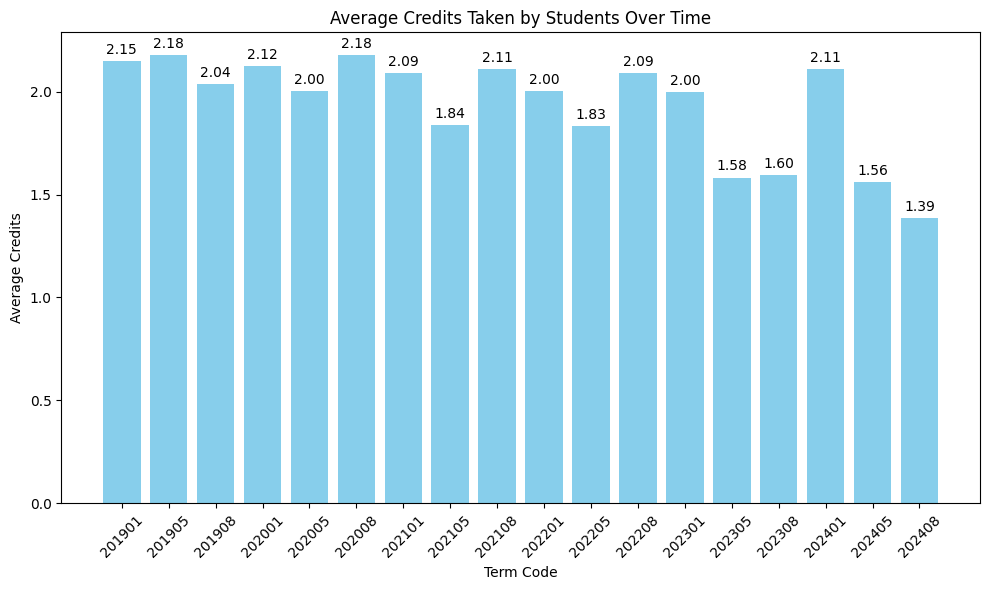

In [17]:
import matplotlib.pyplot as plt

# Ensure the data is sorted by term_code for proper ordering in the bar plot
average_credits_df = average_credits_df.sort_values(by="term_code")

# Plot the data
plt.figure(figsize=(10, 6))
bars = plt.bar(average_credits_df["term_code"], average_credits_df["average_credits"], color="skyblue")

# Add labels and title
plt.xlabel("Term Code")
plt.ylabel("Average Credits")
plt.title("Average Credits Taken by Students Over Time")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add annotations on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Center the text
        height + 0.02,  # Slightly above the bar
        f'{height:.2f}',  # Format the height as a float with 2 decimal places
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10    # Font size for the annotation
    )

plt.tight_layout()

# Show the plot
plt.show()


# Open-ended Analysis

### Directions

In this section, please explore the `university.db` database and conduct any additional analyses you find interesting. This is an opportunity to showcase your skills, creativity, and analytical thinking. Feel free to ask questions, propose new analyses, or present your findings in any format you prefer (e.g., tables, charts, written summaries).

You can use SQL queries, Python code, data visualizations, or any other tools you find suitable for the task. Your analysis can cover topics like student performance, course enrollment trends, faculty characteristics, or any other aspect of the university data.

### Possible Questions for Analysis

Below are some example questions you might explore. They are only suggestions. You are **not** obligated to answer all or any of them. Pick one or come up with your own question to answer.

#### Grade Analysis
- Are there particular **courses**, **instructors**, or **student populations** that have significant deviations in outcomes?
- How do **average grades** differ across terms, courses, or majors?
- What is the distribution of grades for students in honors (HNR) or English as a Second Language (ESL) programs?

#### Enrollment Patterns
- What are the **enrollment patterns** for courses by day and/or time?
- Which courses have the **highest or lowest enrollments** across all terms?
- How do enrollments differ across **delivery modes** (in-person, hybrid, online)?

#### Instructor Impact
- Do specific instructors have consistently **higher or lower average grades** in their courses?
- How do full-time versus part-time instructors differ in terms of course outcomes?

#### Term Trends
- Are there any **seasonal trends** in course enrollment or performance (e.g., winter vs. summer)?
- What is the average number of courses taken by students in each term?

#### Student Demographics
- What percentage of students are enrolled in **honors** or **athletic programs** each term?
- How does student performance differ by **gender** or **ethnicity**?

#### Course Specific Analysis
- What is the **most common combination** of courses taken by students in a given term?
- How do **drop/withdrawal rates** vary by course, instructor, or term?

In [18]:
## Your open ended analysis goes here

# Finish

### Submission Instructions
Once you are finished with the analysis, please save the notebook and email the link to Isaac at ikerson@gsu.edu. If you have any questions or need assistance, feel free to reach to contact Isaac.

We appreciate your time and effort. Good luck, and we look forward to discussing your work!